# Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt


In [2]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

# Loading Data

In [3]:
train_data = CIFAR100(download=True, root="./data", transform=train_transform)
test_data = CIFAR100(root="./data", train=False, transform=test_transform)

Files already downloaded and verified


In [4]:
for image, label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[ 2.4300,  2.4495,  2.4300,  ...,  1.3380,  0.7920,  0.6165],
         [ 2.4300,  2.4495,  2.4300,  ...,  1.2405,  1.1625,  0.7140],
         [ 2.4300,  2.4495,  2.4300,  ...,  1.2210,  0.7335,  0.3825],
         ...,
         [-0.1831, -0.1441, -0.1831,  ..., -1.9381, -2.0941, -0.6316],
         [-0.8071, -0.8266, -0.8071,  ..., -2.1526, -1.8601, -0.4756],
         [-0.1831, -0.1441, -0.1831,  ..., -1.9381, -2.0941, -0.6316]],

        [[ 2.5636,  2.5833,  2.5636,  ...,  1.7149,  1.0241,  0.8662],
         [ 2.5636,  2.5833,  2.5636,  ...,  1.6557,  1.4781,  1.0636],
         [ 2.5636,  2.5833,  2.5636,  ...,  1.5767,  1.1228,  0.7478],
         ...,
         [ 0.6097,  0.6492,  0.6097,  ..., -2.0547, -2.1336, -0.2390],
         [-0.0416, -0.0416, -0.0416,  ..., -2.2718, -1.7389,  0.1755],
         [ 0.6097,  0.6492,  0.6097,  ..., -2.0547, -2.1336, -0.2390]],

        [[ 2.7406,  2.7600,  2.7406,  ...,  1.5787,  0.7266,  0

In [5]:
train_classes_items = dict()

for train_item in train_data:
    label = train_data.classes[train_item[1]]
    if label not in train_classes_items:
        train_classes_items[label] = 1
    else:
        train_classes_items[label] += 1

train_classes_items

{'cattle': 500,
 'dinosaur': 500,
 'apple': 500,
 'boy': 500,
 'aquarium_fish': 500,
 'telephone': 500,
 'train': 500,
 'cup': 500,
 'cloud': 500,
 'elephant': 500,
 'keyboard': 500,
 'willow_tree': 500,
 'sunflower': 500,
 'castle': 500,
 'sea': 500,
 'bicycle': 500,
 'wolf': 500,
 'squirrel': 500,
 'shrew': 500,
 'pine_tree': 500,
 'rose': 500,
 'television': 500,
 'table': 500,
 'possum': 500,
 'oak_tree': 500,
 'leopard': 500,
 'maple_tree': 500,
 'rabbit': 500,
 'chimpanzee': 500,
 'clock': 500,
 'streetcar': 500,
 'cockroach': 500,
 'snake': 500,
 'lobster': 500,
 'mountain': 500,
 'palm_tree': 500,
 'skyscraper': 500,
 'tractor': 500,
 'shark': 500,
 'butterfly': 500,
 'bottle': 500,
 'bee': 500,
 'chair': 500,
 'woman': 500,
 'hamster': 500,
 'otter': 500,
 'seal': 500,
 'lion': 500,
 'mushroom': 500,
 'girl': 500,
 'sweet_pepper': 500,
 'forest': 500,
 'crocodile': 500,
 'orange': 500,
 'tulip': 500,
 'mouse': 500,
 'camel': 500,
 'caterpillar': 500,
 'man': 500,
 'skunk': 500

In [6]:
test_classes_items = dict()
for test_item in test_data:
    label = test_data.classes[test_item[1]]
    if label not in test_classes_items:
        test_classes_items[label] = 1
    else:
        test_classes_items[label] += 1

test_classes_items

{'mountain': 100,
 'forest': 100,
 'seal': 100,
 'mushroom': 100,
 'sea': 100,
 'tulip': 100,
 'camel': 100,
 'butterfly': 100,
 'cloud': 100,
 'apple': 100,
 'skunk': 100,
 'streetcar': 100,
 'rocket': 100,
 'lamp': 100,
 'lion': 100,
 'wolf': 100,
 'rose': 100,
 'orange': 100,
 'dinosaur': 100,
 'chimpanzee': 100,
 'can': 100,
 'keyboard': 100,
 'bicycle': 100,
 'chair': 100,
 'plate': 100,
 'lawn_mower': 100,
 'turtle': 100,
 'palm_tree': 100,
 'shark': 100,
 'pickup_truck': 100,
 'boy': 100,
 'couch': 100,
 'house': 100,
 'porcupine': 100,
 'cockroach': 100,
 'clock': 100,
 'castle': 100,
 'beaver': 100,
 'bee': 100,
 'bottle': 100,
 'pear': 100,
 'baby': 100,
 'flatfish': 100,
 'oak_tree': 100,
 'leopard': 100,
 'snail': 100,
 'crocodile': 100,
 'rabbit': 100,
 'beetle': 100,
 'girl': 100,
 'sunflower': 100,
 'raccoon': 100,
 'train': 100,
 'ray': 100,
 'trout': 100,
 'bowl': 100,
 'snake': 100,
 'orchid': 100,
 'tractor': 100,
 'caterpillar': 100,
 'bus': 100,
 'mouse': 100,
 'cr

# BATCHSIZE & DataLoader

In [7]:
BATCH_SIZE = 128
train_dl = DataLoader(train_data, BATCH_SIZE, num_workers=4, pin_memory=True, shuffle=True)
test_dl = DataLoader(test_data, BATCH_SIZE, num_workers=4, pin_memory=True)

# Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


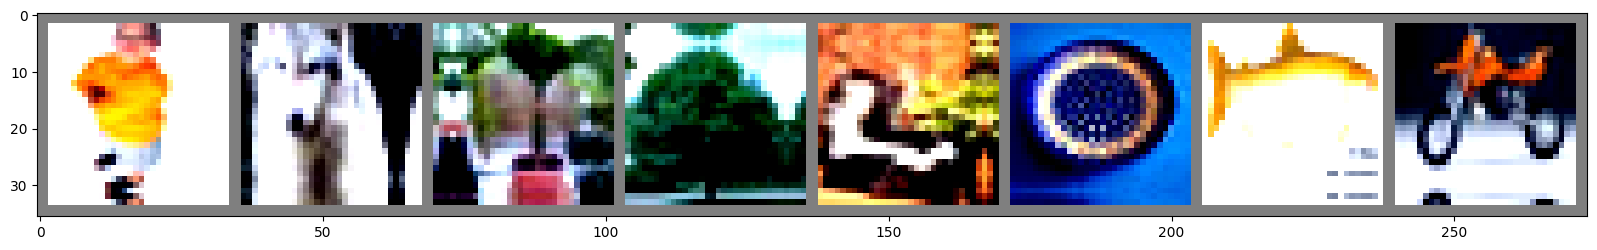

boy                 wolf                palm_tree           oak_tree            skunk               plate               trout               motorcycle          


In [8]:
# for 8 images
train_8_samples = DataLoader(train_data, 8, num_workers=4, pin_memory=True, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_8_samples)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print(''.join(f'{train_data.classes[labels[j]]:20s}' for j in range(8)))

# Get CUDA ready

In [9]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    return torch.device("cpu")

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class ToDeviceLoader:
    def __init__(self,data,device):
        self.data = data
        self.device = device
        
    def __iter__(self):
        for batch in self.data:
            yield to_device(batch,self.device)
            
    def __len__(self):
        return len(self.data)


In [10]:
device = get_device()
print(device)

train_dl = ToDeviceLoader(train_dl, device)
test_dl = ToDeviceLoader(test_dl, device)

cuda


In [11]:
def accuracy(predicted, actual):
    _, predictions = torch.max(predicted, dim=1)
    return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))

# BaseModel

In [12]:
class BaseModel(nn.Module):
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {"val_loss":loss.detach(),"val_acc":acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [loss["val_loss"] for loss in outputs]
        loss = torch.stack(batch_losses).mean()
        batch_accuracy = [accuracy["val_acc"] for accuracy in outputs]
        acc = torch.stack(batch_accuracy).mean()
        return {"val_loss":loss.item(),"val_acc":acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [14]:
# model = ResNet(3,100)
from torchvision import models

class ResNet101Model(BaseModel):
    def __init__(self, num_classes):
        super().__init__()
        self.model = models.resnet101(pretrained=False)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.model(x)

In [15]:

model = ResNet101Model(num_classes=100)
model = to_device(model, device)

/home/howardkao/anaconda3/envs/dmlsproject/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/howardkao/anaconda3/envs/dmlsproject/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# SAM Optimizer

In [16]:
import torch


class SAM(torch.optim.Optimizer):
    def __init__(self, params, base_optimizer, rho=0.1, **kwargs):
        assert rho >= 0.0, f"Invalid rho, should be non-negative: {rho}"

        defaults = dict(rho=rho, **kwargs)
        super(SAM, self).__init__(params, defaults)

        self.base_optimizer = base_optimizer(self.param_groups, **kwargs)
        self.param_groups = self.base_optimizer.param_groups

    @torch.no_grad()
    def first_step(self, zero_grad=False):
        grad_norm = self.grad_norm()
        for group in self.param_groups:
            scale = group["rho"] / (grad_norm + 1e-12)
            for p in group["params"]:
                if p.grad is None: continue
                e_w = p.grad * scale
                p.add_(e_w)  # climb to the local maximum "w + e(w)"
                self.state[p]["e_w"] = e_w

        if zero_grad: self.zero_grad()

    @torch.no_grad()
    def second_step(self, zero_grad=False):
        for group in self.param_groups:
            for p in group["params"]:
                if p.grad is None: continue
                p.sub_(self.state[p]["e_w"])  # get back to "w" from "w + e(w)"

        self.base_optimizer.step()  # do the actual "sharpness-aware" update

        if zero_grad: self.zero_grad()

    def step(self, closure=None):
        raise NotImplementedError("SAM doesn't work like the other optimizers, you should first call `first_step` and the `second_step`; see the documentation for more info.")

    def grad_norm(self):
        norm = torch.norm(
                    torch.stack([
                        p.grad.norm(p=2)
                        for group in self.param_groups for p in group["params"]
                        if p.grad is not None
                    ]),
                    p=2
               )
        return norm

# Evaluation & Fit Function for Training

In [17]:
@torch.no_grad()
def evaluate(model,test_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_dl]
    return model.validation_epoch_end(outputs)

criterion = nn.CrossEntropyLoss()

In [18]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit (epochs, train_dl, test_dl, model, optimizer, max_lr, weight_decay, scheduler, rho, grad_clip=None):
    torch.cuda.empty_cache()
    
    history = []
    
    optimizer = optimizer(
        model.parameters(),
        torch.optim.SGD,
        rho=rho,
        lr=max_lr,
        weight_decay=weight_decay,
    )
    
    scheduler = scheduler(optimizer.base_optimizer, T_max=epochs * len(train_dl))
    
    for epoch in range(epochs):
        model.train()
        
        train_loss = []
        
        lrs = []
        
        for batch in train_dl:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)

            with torch.set_grad_enabled(True):
                # compute output
                outputs = model(inputs)
                batch_loss = criterion(outputs, targets)
                train_loss.append(batch_loss.item())

                # compute gradient and do SGD step
                optimizer.zero_grad()
                batch_loss.backward(retain_graph=True)

                optimizer.first_step(zero_grad=True)

                # second forward-backward pass
                outputs = model(inputs)
                batch_loss = criterion(outputs, targets) 
                batch_loss.backward()
                optimizer.second_step(zero_grad=True)
            
            scheduler.step()
            lrs.append(get_lr(optimizer))
        result = evaluate(model, test_dl)
        result["train_loss"] = torch.tensor(train_loss).mean().item()
        result["lrs"] = lrs
        
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history
            

In [19]:
epochs = 200
optimizer = SAM
max_lr = 0.05
grad_clip = 0.1
weight_decay = 5e-3
rho = 0.1
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR

# Training

In [20]:
%%time
history = fit(epochs=epochs, train_dl=train_dl, test_dl=test_dl, model=model, 
              optimizer=optimizer, max_lr=max_lr,
              weight_decay=weight_decay, scheduler=scheduler, rho=rho)

/home/howardkao/anaconda3/envs/dmlsproject/lib/python3.12/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [0], last_lr: 0.05000, train_loss: 4.4616, val_loss: 4.0127, val_acc: 0.0862
Epoch [1], last_lr: 0.04999, train_loss: 3.8873, val_loss: 3.7369, val_acc: 0.1271
Epoch [2], last_lr: 0.04997, train_loss: 3.6965, val_loss: 3.5825, val_acc: 0.1557
Epoch [3], last_lr: 0.04995, train_loss: 3.5623, val_loss: 3.5031, val_acc: 0.1771
Epoch [4], last_lr: 0.04992, train_loss: 3.4479, val_loss: 3.3730, val_acc: 0.1899
Epoch [5], last_lr: 0.04989, train_loss: 3.3486, val_loss: 3.2962, val_acc: 0.2057
Epoch [6], last_lr: 0.04985, train_loss: 3.2503, val_loss: 3.1787, val_acc: 0.2251
Epoch [7], last_lr: 0.04980, train_loss: 3.1547, val_loss: 3.0524, val_acc: 0.2539
Epoch [8], last_lr: 0.04975, train_loss: 3.0628, val_loss: 2.9745, val_acc: 0.2634
Epoch [9], last_lr: 0.04969, train_loss: 2.9856, val_loss: 2.8932, val_acc: 0.2825
Epoch [10], last_lr: 0.04963, train_loss: 2.8946, val_loss: 2.8991, val_acc: 0.2930
Epoch [11], last_lr: 0.04956, train_loss: 2.8145, val_loss: 2.8309, val_acc: 0.3094
Ep

# Plotting

In [21]:
def plot_acc(history):
    plt.plot([x["val_acc"] for x in history],"-x")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

def plot_loss(history):
    plt.plot([x.get("train_loss") for x in history], "-bx")
    plt.plot([x["val_loss"] for x in history],"-rx")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train loss","val loss"])
    
def plot_lrs(history):
    plt.plot(np.concatenate([x.get("lrs",[]) for x in history]))
    plt.xlabel("Batch number")
    plt.ylabel("Learning rate")

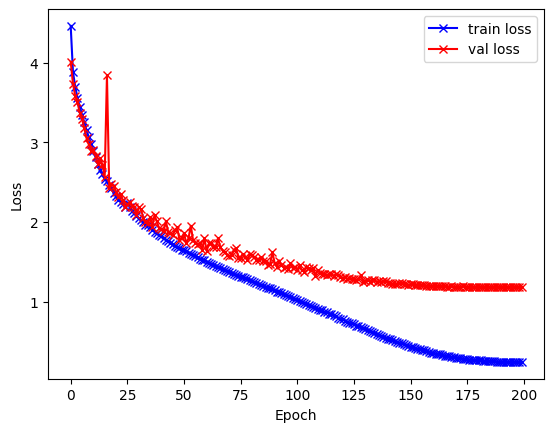

In [22]:
plot_loss(history)

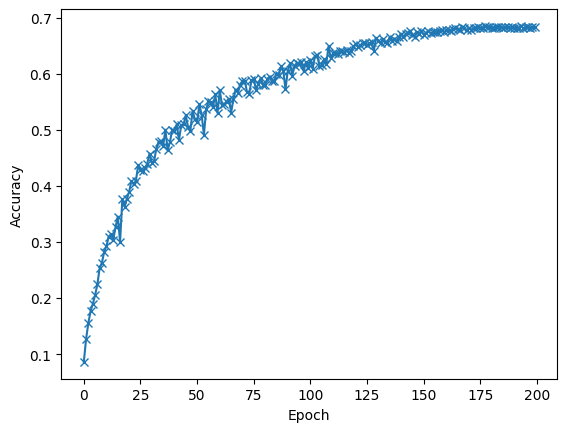

In [23]:
plot_acc(history)

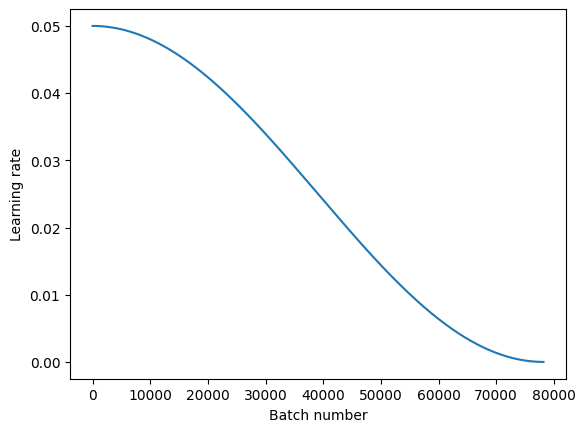

In [24]:
plot_lrs(history)

In [25]:
import json
import os
file_path = f'sam_scratch_wd5e-3.json'
def store_history(history, file_path):
    if not os.path.exists(file_path):
        with open(file_path, 'w') as json_file:
            pass 
    with open(file_path, 'w') as json_file:
        json.dump(history, json_file)

store_history(history, file_path)

# Make predictions and see the image with its result


In [26]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return test_data.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: mountain , Predicted: man


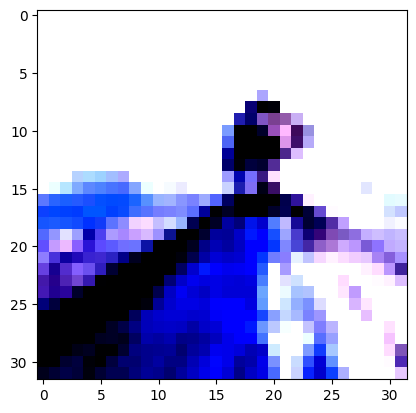

In [27]:
img, label = test_data[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: wardrobe , Predicted: wardrobe


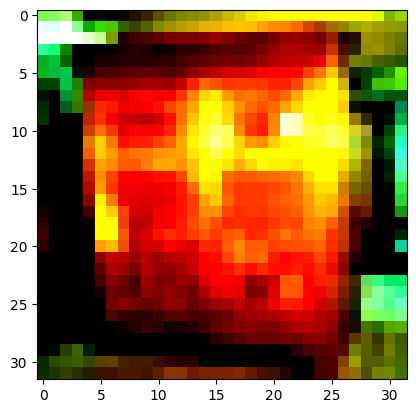

In [28]:
img, label = test_data[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

# Save

In [29]:
torch.save(model.state_dict(), 'sam_scratch_wd5e-3.pth')

In [30]:
print("finish")

finish


In [31]:

def test_accuracy(model, test_data):

    correct = 0
    for image, label in test_data:
        
        y = predict_image(image, model)
        if y == test_data.classes[label]:
            correct += 1

    return correct/len(test_data)
    

In [32]:
test_accuracy(model, test_data)

0.6821